## Telecom Customer Churn Python Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.duplicated().sum()

0

In [4]:
df["customerID"].duplicated().sum()

0

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
sn = {0:"No", 1:"Yes"}
df["SeniorCitizen"] = df["SeniorCitizen"].replace(sn)
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [9]:
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("",np.nan)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(np.nan,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df["tenurexmonthly"] = df["tenure"]*df["MonthlyCharges"]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurexmonthly
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


In [13]:
df["diff"] = df["tenurexmonthly"] - df["TotalCharges"]
print(min(df["diff"]))
print(max(df["diff"]))

-373.2500000000009
370.84999999999945


In [14]:
print("tenurexmonthly value is ", df["tenurexmonthly"].sum() )
print("TotalCharges value is ", df["TotalCharges"].sum() )
print("diff value is ", df["diff"].sum() )

tenurexmonthly value is  16055091.45
TotalCharges value is  16056168.7
diff value is  -1077.2499999999823


In [15]:
df = df.drop(columns = ["tenurexmonthly","diff"] )
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


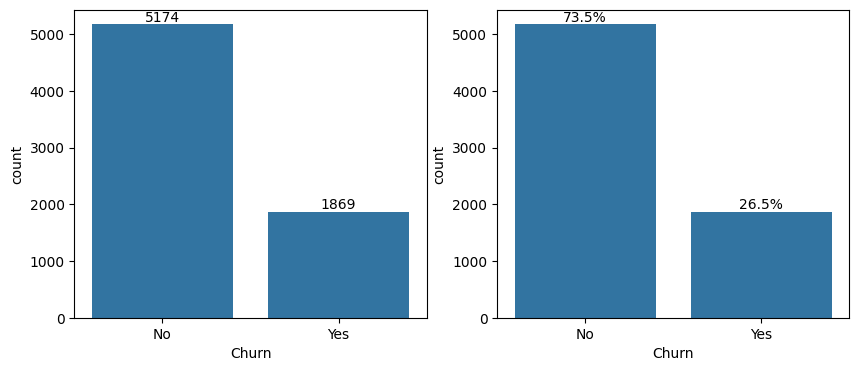

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax1 = sns.countplot(x="Churn", data=df)
ax1.bar_label(ax1.containers[0])

plt.subplot(1,2,2)
ax2 = sns.countplot(x="Churn", data=df)
total = len(df)
for container in ax2.containers: 
    ax2.bar_label(container, labels=[f'{(v/total)*100:.1f}%' for v in container.datavalues])

plt.show()

In [17]:
df1 = df.loc[ df["Churn"] == "Yes" ]

df2 = df.loc[ df["Churn"] == "No" ]

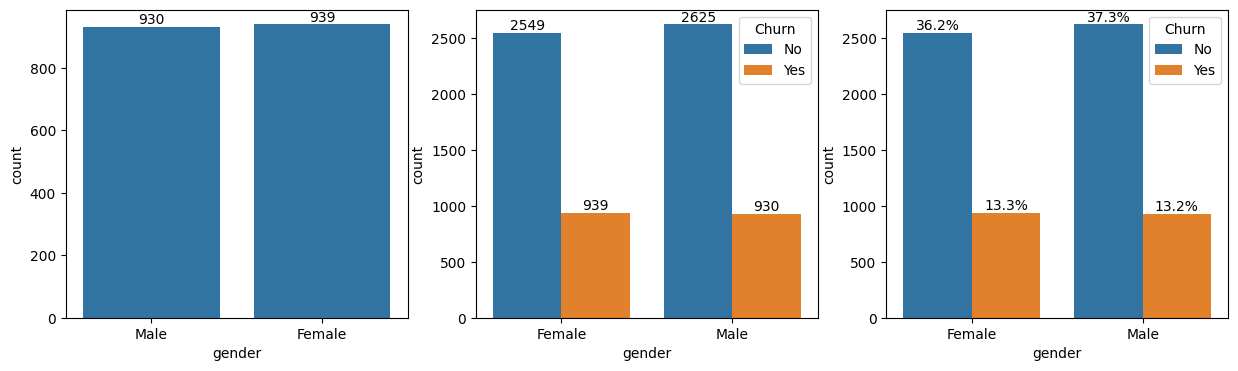

In [18]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
ax = sns.countplot( x="gender", data=df1)
ax.bar_label(ax.containers[0])

plt.subplot(1,3,2)
ax1 = sns.countplot(x="gender", data=df, hue="Churn")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.subplot(1,3,3)
ax2 = sns.countplot(x="gender", data=df, hue="Churn")
total = len(df)
for container in ax2.containers: 
    ax2.bar_label(container, labels=[f'{(v/total)*100:.1f}%' for v in container.datavalues])

plt.show()

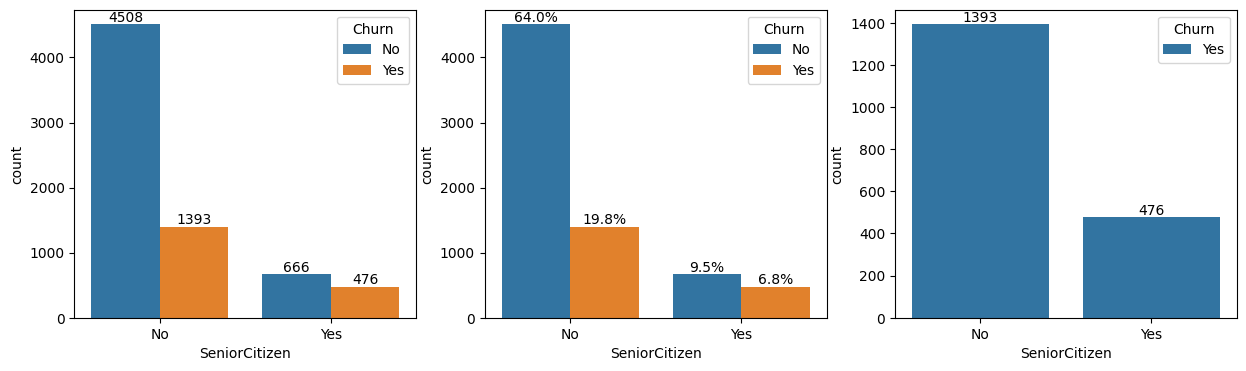

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
ax1 = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.subplot(1,3,2)
ax2 = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
total = len(df)

for container in ax2.containers: 
    ax2.bar_label(container, labels=[f'{(v/total)*100:.1f}%' for v in container.datavalues])

plt.subplot(1,3,3)
ax3 = sns.countplot( x="SeniorCitizen", data=df1, hue="Churn")
ax3.bar_label(ax3.containers[0])

plt.show()

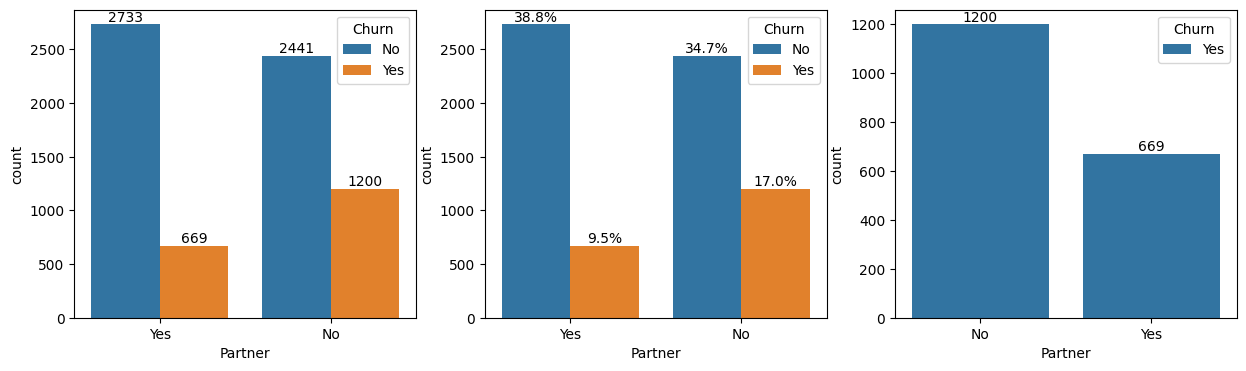

In [20]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
ax1 = sns.countplot(x="Partner", data=df, hue="Churn")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.subplot(1,3,2)
ax2 = sns.countplot(x="Partner", data=df, hue="Churn")
total = len(df)
for container in ax2.containers: 
    ax2.bar_label(container, labels=[f'{(v/total)*100:.1f}%' for v in container.datavalues])

plt.subplot(1,3,3)
ax3 = sns.countplot( x="Partner", data=df1, hue="Churn")
ax3.bar_label(ax3.containers[0])

plt.show()

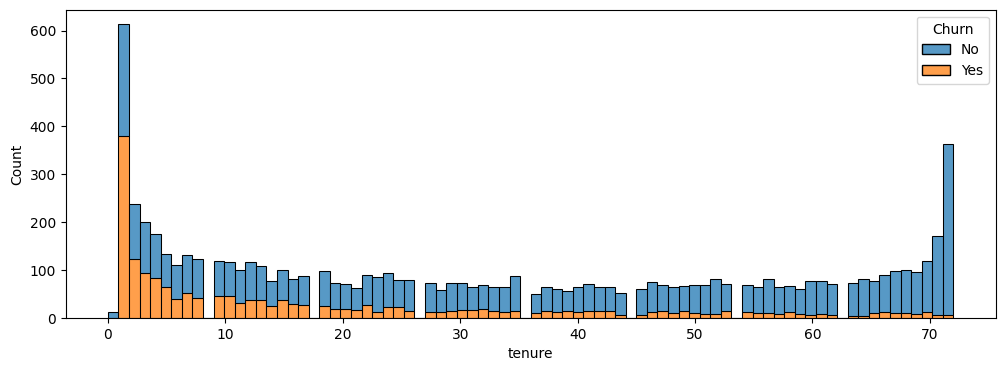

In [21]:
plt.figure( figsize=(12,4) )
sns.histplot( x="tenure", data=df, hue="Churn",  multiple='stack', bins=80 )
plt.show()

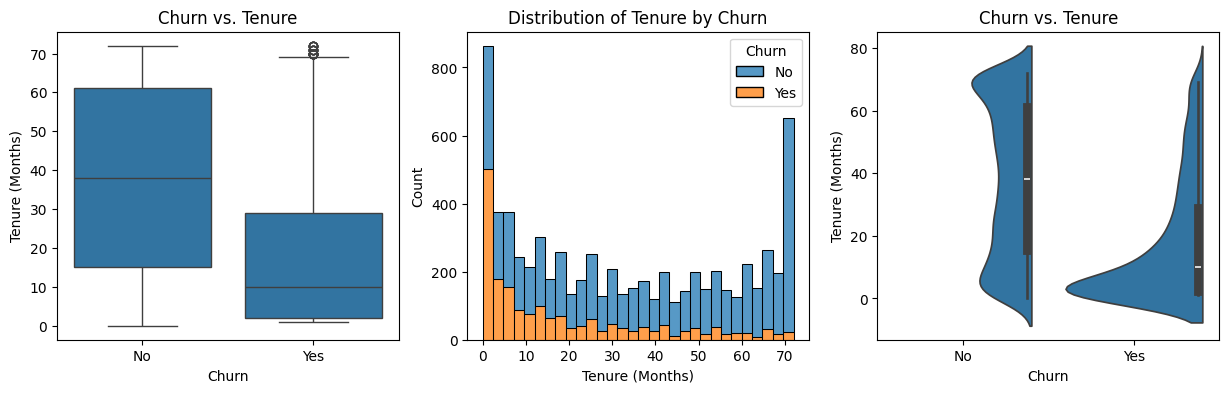

In [22]:
#To visualize churn based on tenure, you can use various types of plots, such as:
plt.figure(figsize=(15, 4))

#boxplot
plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

#histogram
plt.subplot(1,3,2)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

#violin plot
plt.subplot(1,3,3)
sns.violinplot(x='Churn', y='tenure', data=df, split=True)
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

plt.show()

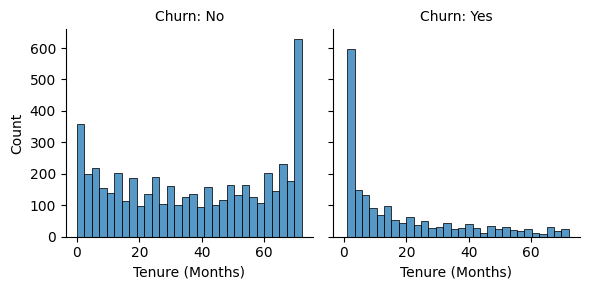

In [23]:
#Facet Grid Histogram:
g = sns.FacetGrid(df, col="Churn", height=3,  aspect=1)
g.map(sns.histplot, "tenure", bins=30)
g.set_axis_labels('Tenure (Months)', 'Count')
g.set_titles('Churn: {col_name}')

plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


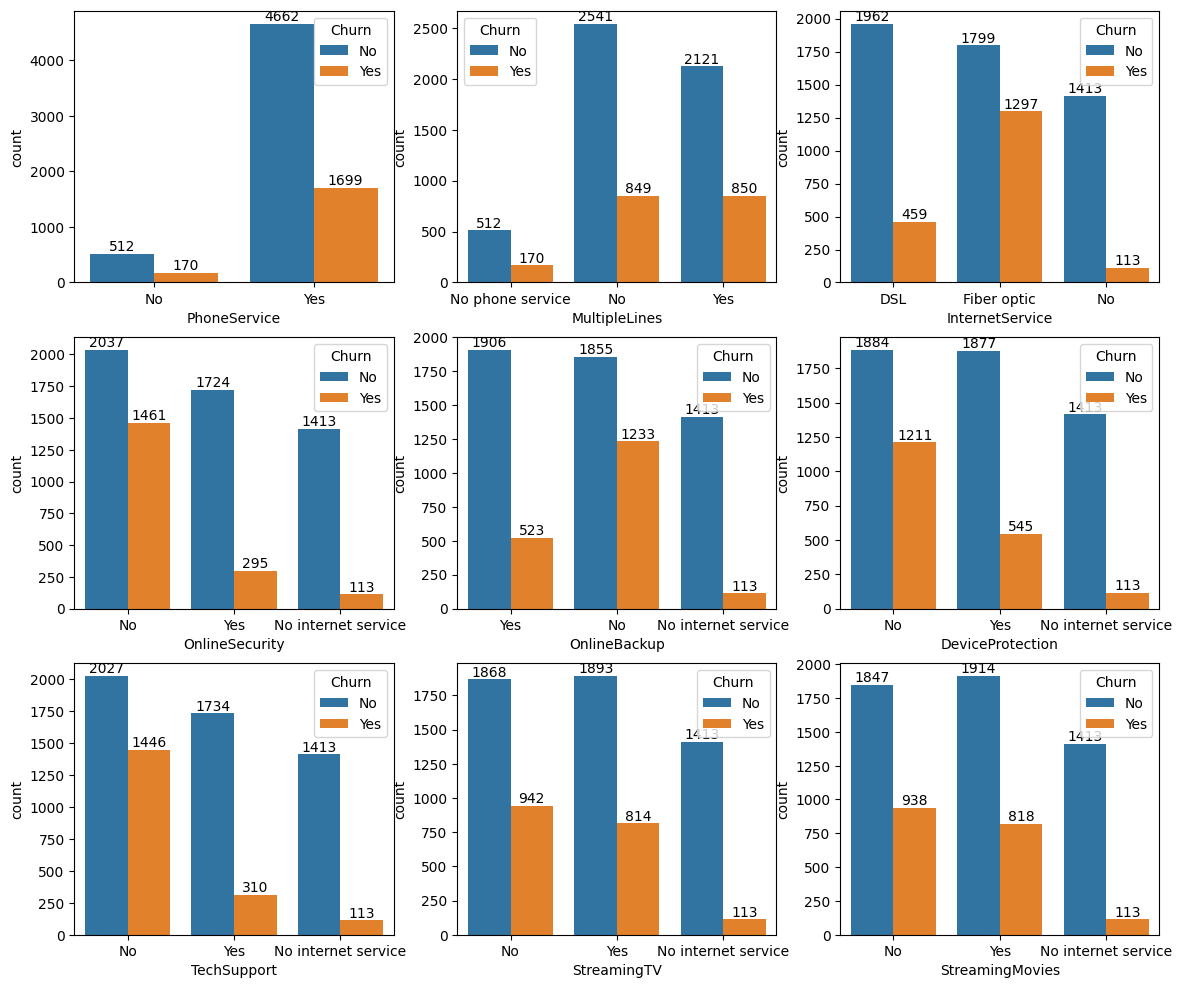

In [25]:
#visualizations that highlight the relationships between customer churn and key categorical features:

plt.figure(figsize=(14,12))

plt.subplot(3,3,1)
ax1 = sns.countplot( x="PhoneService", data=df, hue="Churn" )
ax1.bar_label(ax1.containers[0]) 
ax1.bar_label(ax1.containers[1]) 

plt.subplot(3,3,2)
ax2 = sns.countplot( x="MultipleLines", data=df, hue="Churn" )
ax2.bar_label(ax2.containers[0]) 
ax2.bar_label(ax2.containers[1]) 


plt.subplot(3,3,3)
ax3 = sns.countplot( x="InternetService", data=df, hue="Churn" )
ax3.bar_label(ax3.containers[0]) 
ax3.bar_label(ax3.containers[1]) 

plt.subplot(3,3,4)
ax4 = sns.countplot( x="OnlineSecurity", data=df, hue="Churn" )
ax4.bar_label(ax4.containers[0]) 
ax4.bar_label(ax4.containers[1]) 

plt.subplot(3,3,5)
ax5 = sns.countplot( x="OnlineBackup", data=df, hue="Churn" )
ax5.bar_label(ax5.containers[0]) 
ax5.bar_label(ax5.containers[1]) 

plt.subplot(3,3,6)
ax6 = sns.countplot( x="DeviceProtection", data=df, hue="Churn" )
ax6.bar_label(ax6.containers[0]) 
ax6.bar_label(ax6.containers[1]) 

plt.subplot(3,3,7)
ax7 = sns.countplot( x="TechSupport", data=df, hue="Churn" )
ax7.bar_label(ax7.containers[0]) 
ax7.bar_label(ax7.containers[1]) 

plt.subplot(3,3,8)
ax8 = sns.countplot( x="StreamingTV", data=df, hue="Churn" )
ax8.bar_label(ax8.containers[0]) 
ax8.bar_label(ax8.containers[1]) 

plt.subplot(3,3,9)
ax9 = sns.countplot( x="StreamingMovies", data=df, hue="Churn" )
ax9.bar_label(ax9.containers[0]) 
ax9.bar_label(ax9.containers[1]) 

plt.show()

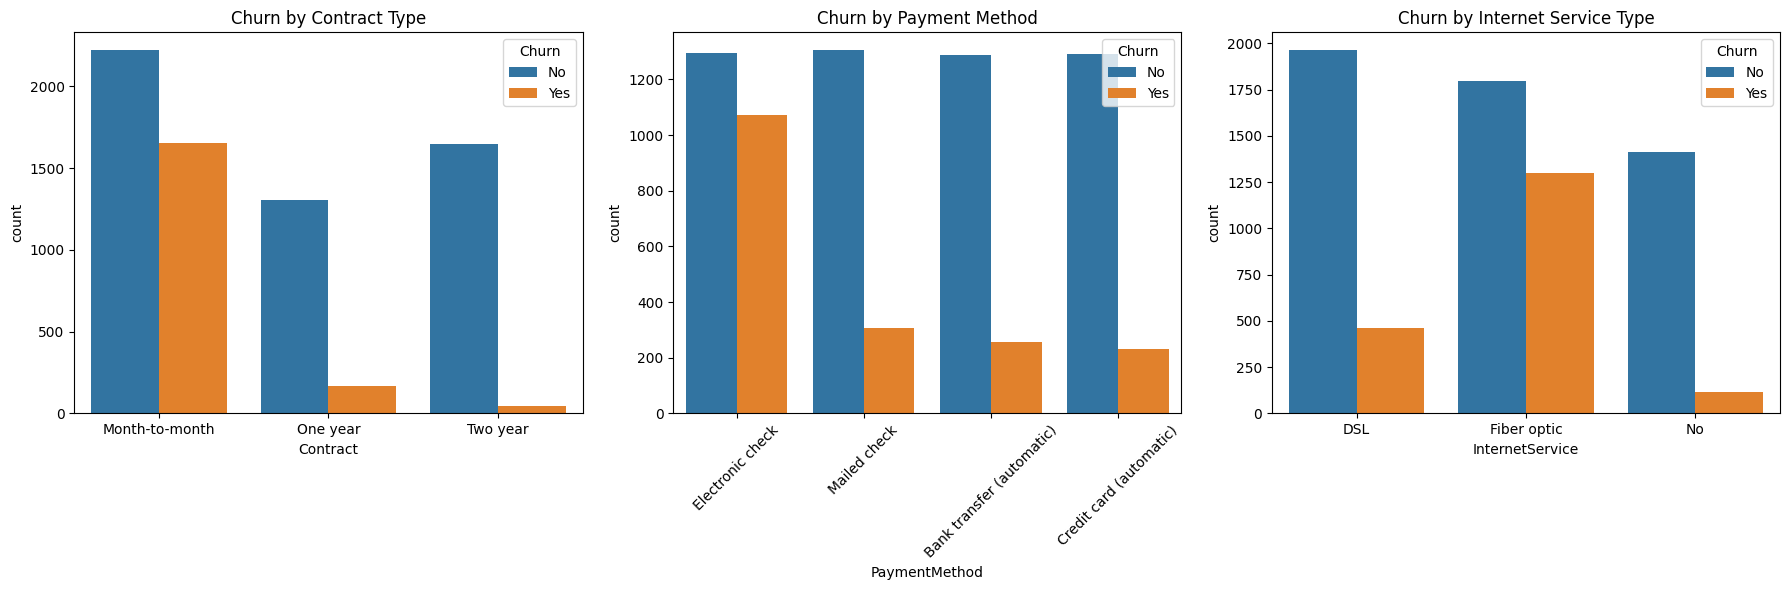

In [26]:
#visualizations that highlight the relationships between customer churn and key categorical features:
# Set the style for the plots
#sns.set(style="whitegrid")
# Plotting churn distribution based on Contract, PaymentMethod, and InternetService

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], x='Contract', hue='Churn', data=df )
axes[0].set_title('Churn by Contract Type')

sns.countplot(ax=axes[1], x='PaymentMethod', hue='Churn', data=df)
axes[1].set_title('Churn by Payment Method')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], x='InternetService', hue='Churn', data=df)
axes[2].set_title('Churn by Internet Service Type')

plt.tight_layout()
plt.show()

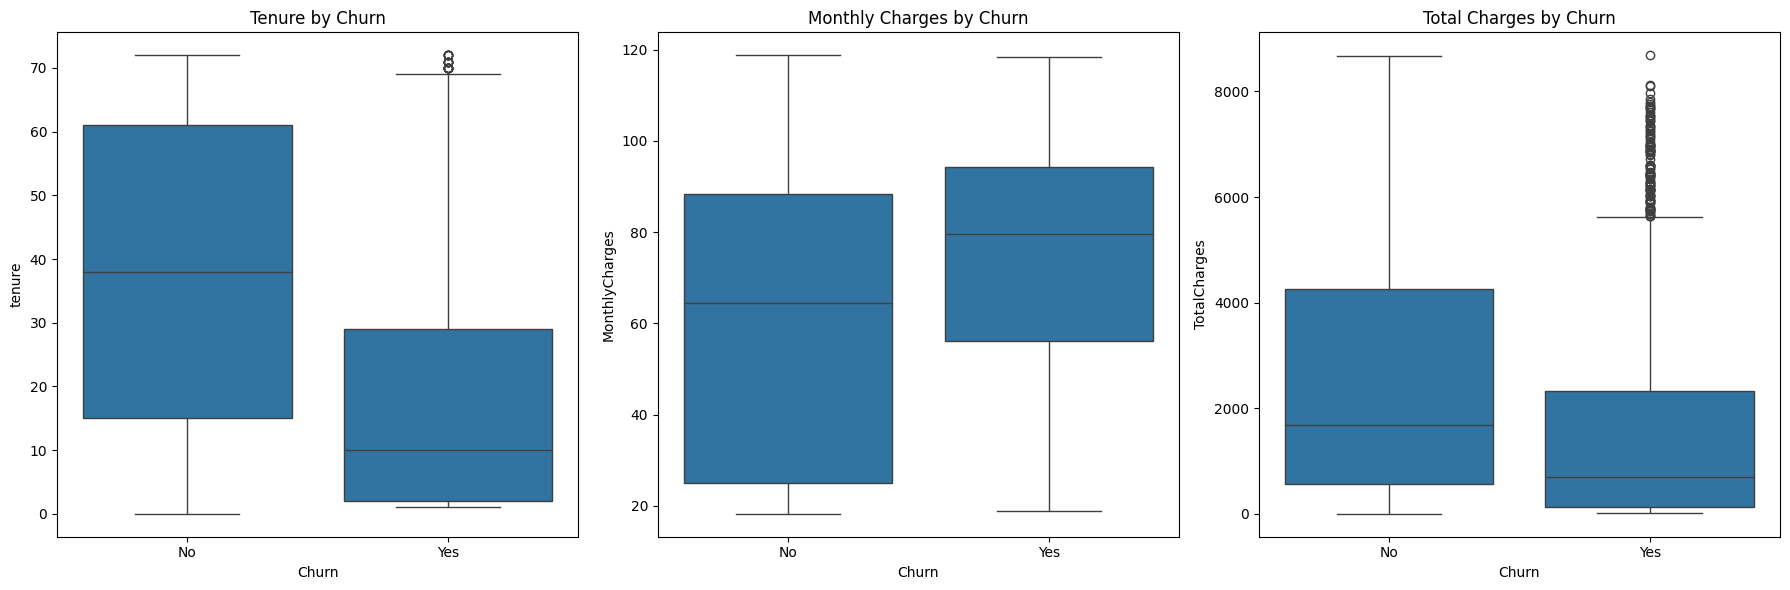

In [27]:
#Numerical Features Analysis - We’ll examine how tenure, MonthlyCharges, and TotalCharges differ between customers who churned and those who didn't.
# Plot distribution of numerical features based on churn

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='Churn', y='tenure', data=df)
axes[0].set_title('Tenure by Churn')

sns.boxplot(ax=axes[1], x='Churn', y='MonthlyCharges', data=df)
axes[1].set_title('Monthly Charges by Churn')

sns.boxplot(ax=axes[2], x='Churn', y='TotalCharges', data=df)
axes[2].set_title('Total Charges by Churn')

plt.tight_layout()
plt.show()

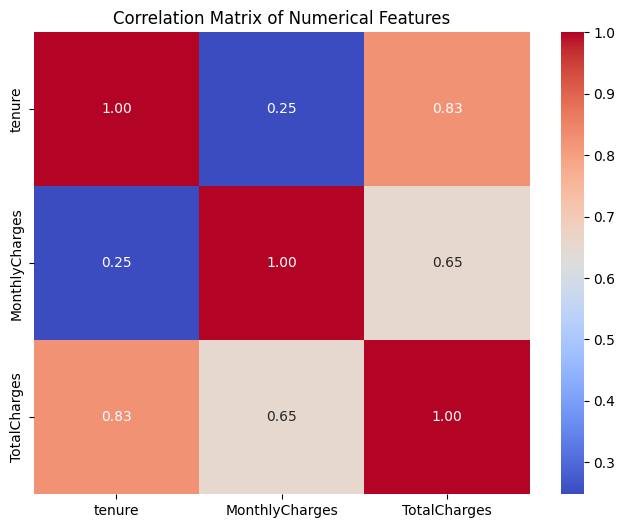

In [28]:
# Correlation matrix - Compute correlations between numerical features and visualize them using a heatmap.

corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [29]:
#Churn Prediction (Logistic Regression) - Build a simple logistic regression model to predict churn based on key features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical variables
label_encoder = LabelEncoder()
churn_data_encoded = df.copy()
for column in churn_data_encoded.select_dtypes(include=['object']).columns:
    churn_data_encoded[column] = label_encoder.fit_transform(churn_data_encoded[column])

# Features and target
X = churn_data_encoded.drop(['Churn', 'customerID'], axis=1)
y = churn_data_encoded['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1376  163]
 [ 241  333]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1539
           1       0.67      0.58      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.80      2113



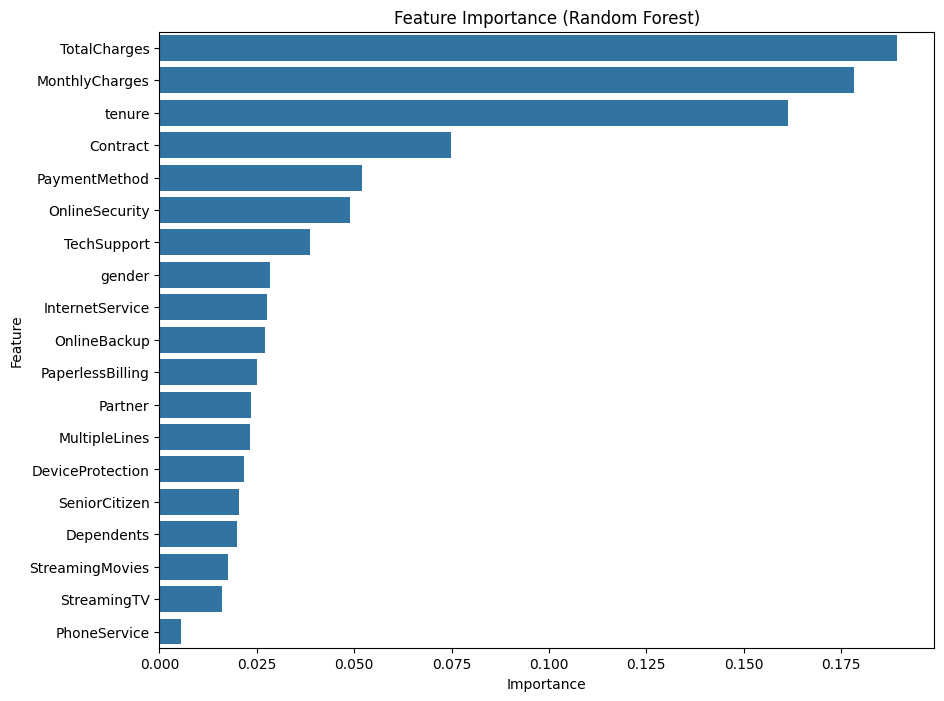

In [30]:
#Feature Importance with Random Forest:
#Use a Random Forest classifier to identify the most important features contributing to customer churn.

from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier(random_state=42).fit(X_train, y_train).feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


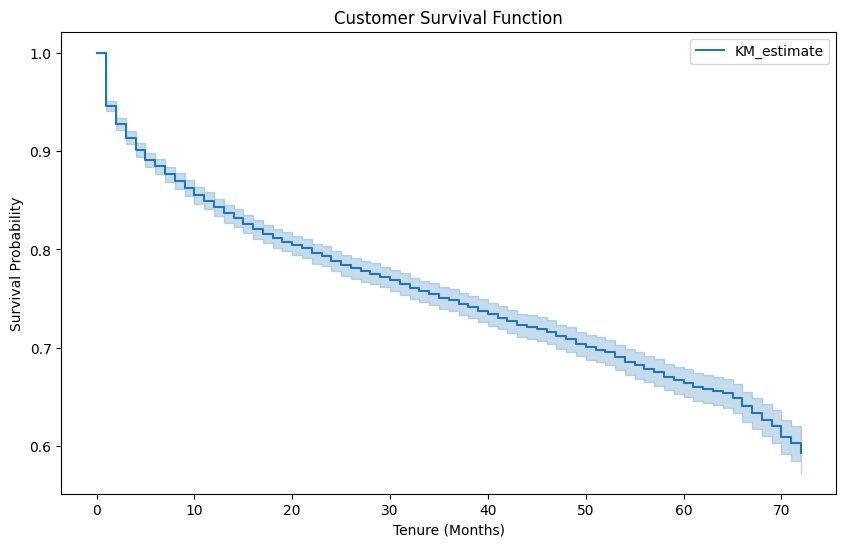

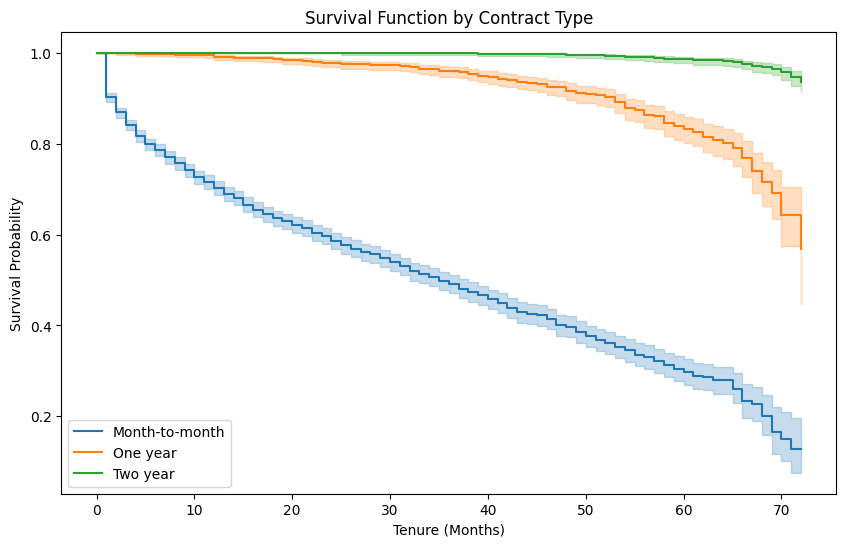

In [31]:
#Survival Analysis:
#Analyze customer survival rates over time to understand how long customers typically stay before churning.
#pip install lifelines

from lifelines import KaplanMeierFitter

# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot survival function for the entire population
kmf.fit(df['tenure'], event_observed=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0))
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Customer Survival Function')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.show()

# Compare survival functions for different contract types
plt.figure(figsize=(10, 6))
for contract_type in df['Contract'].unique():
    kmf.fit(df[df['Contract'] == contract_type]['tenure'],
            event_observed=df[df['Contract'] == contract_type]['Churn'].apply(lambda x: 1 if x == 'Yes' else 0),
            label=contract_type)
    kmf.plot_survival_function()
plt.title('Survival Function by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.show()

In [32]:
#Chi-Square Test for Categorical Features:
#Perform chi-square tests to determine if there’s a significant relationship between categorical features and churn.

from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(feature):
    table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

# Example: Chi-square test for Contract, InternetService, and PaymentMethod
chi_square_test('Contract')
chi_square_test('InternetService')
chi_square_test('PaymentMethod')

Chi-Square Test for Contract:
Chi2 = 1184.60, p-value = 0.0000

Chi-Square Test for InternetService:
Chi2 = 732.31, p-value = 0.0000

Chi-Square Test for PaymentMethod:
Chi2 = 648.14, p-value = 0.0000



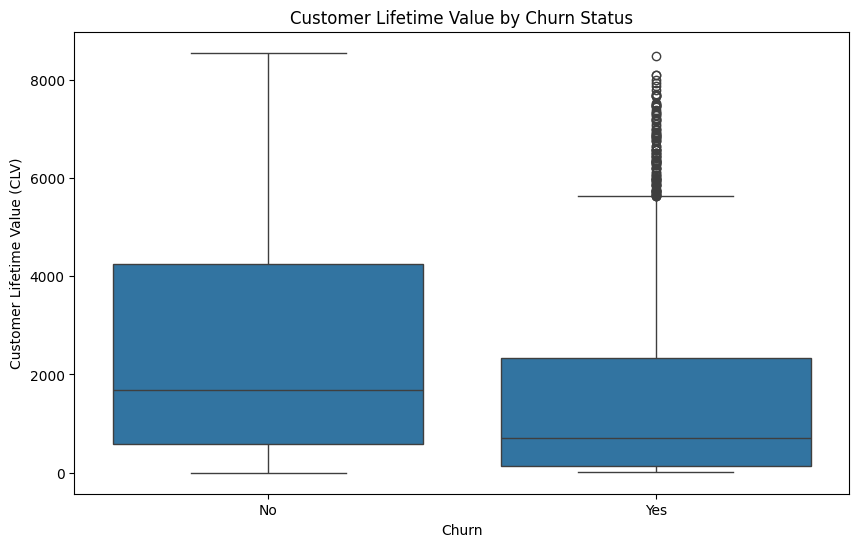

In [33]:
#Customer Lifetime Value (CLV) Estimation:
#Estimate the Customer Lifetime Value based on tenure, monthly charges, and churn status.

# Estimate CLV as tenure * MonthlyCharges
df['CLV'] = df['tenure'] * df['MonthlyCharges']

# Plot CLV distribution by Churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CLV', data=df)
plt.title('Customer Lifetime Value by Churn Status')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.show()

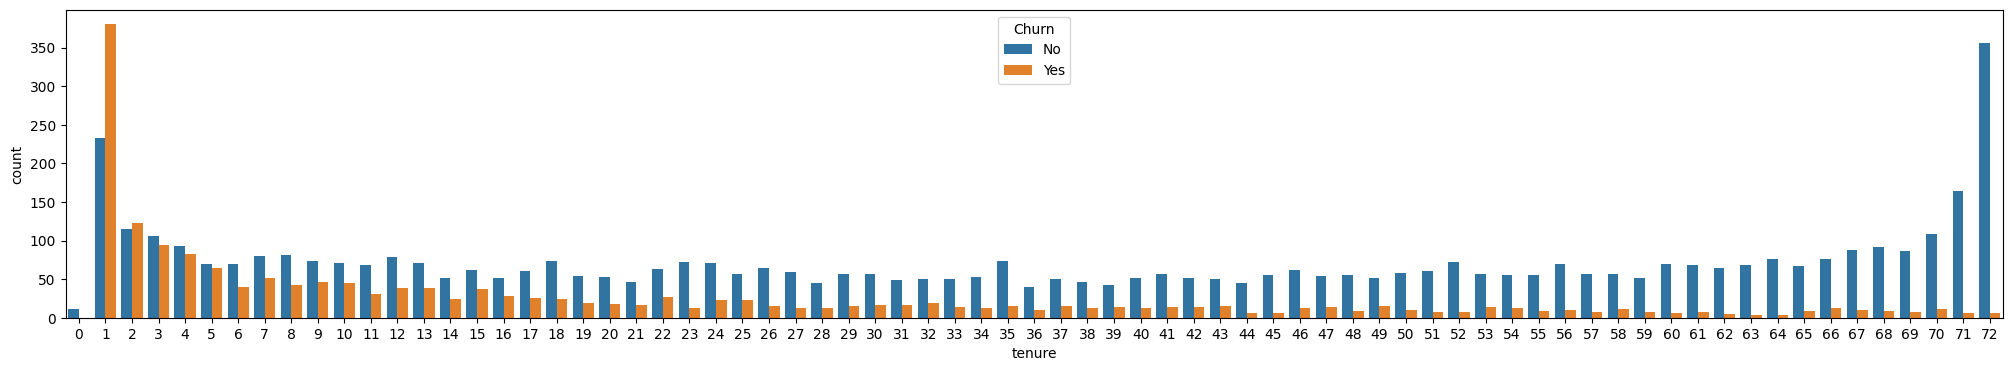

In [37]:
plt.figure( figsize=(25,4) )
ax2 = sns.countplot(x="tenure", data=df, hue="Churn")

plt.show()

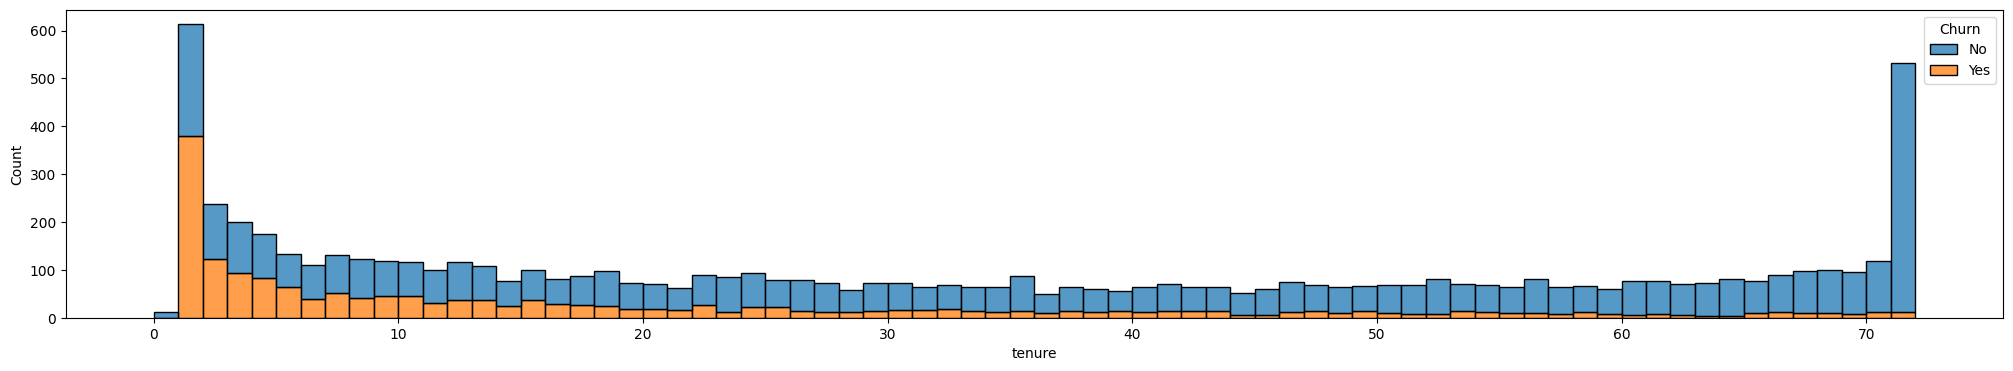

In [40]:
plt.figure( figsize=(25,4) )
sns.histplot( x="tenure", data=df, hue="Churn",  multiple='stack', bins=72)
plt.show()